In [ ]:
import pandas as pd
import numpy as np
import keras 
from keras.layers import Dense,Lambda,Flatten,Input
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [2]:
from keras.models import load_model

In [3]:
model=load_model('transfer_model.h5')

In [4]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 244, 244, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0   

In [5]:
photo=image.load_img('testing\\00-Damaged485.JPEG')
photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
x=image.img_to_array(photo)
x=np.expand_dims(x,axis=0)
x/=255.0
images=np.vstack([x])
classes=model.predict(images)

In [6]:
np.argmax(classes) 

0

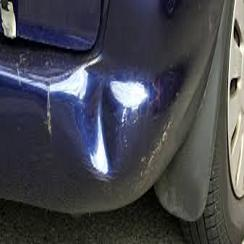

In [7]:
img=Image.open('testing\\00-Damaged485.JPEG')
img

In [9]:
#next step in this project will be to develop this model  more and trying train with more different data and testing with real life pictures

In [10]:
#now i will use the anvil app to deploy this machine for testing 


In [8]:
photo=image.load_img('testing\\swift_bumper.jpg')
photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
x=image.img_to_array(photo)
x=np.expand_dims(x,axis=0)
x/=255.0
images=np.vstack([x])
classes=model.predict(images)

In [9]:
print(classes)

[[7.2976440e-01 1.5385622e-04 4.4487331e-02 1.0471920e-03 5.9654093e-03
  4.5722960e-03 8.1337340e-02 1.3267219e-01]]


In [10]:
np.argmax(classes)

0

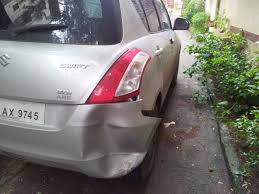

In [11]:
img=Image.open('testing\\swift_bumper.jpg')
img

In [12]:
photo=image.load_img('testing\\swift_door.jpg')
photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
x=image.img_to_array(photo)
x=np.expand_dims(x,axis=0)
x/=255.0
images=np.vstack([x])
classes=model.predict(images)

In [13]:
print(classes)

[[1.2873260e-04 1.2858050e-07 9.9980170e-01 5.2678857e-05 1.4757020e-05
  7.7023287e-08 4.9237235e-07 1.4342763e-06]]


In [14]:
np.argmax(classes)

2

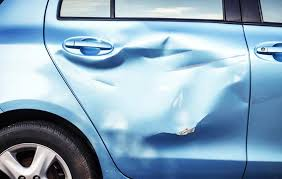

In [15]:
img=Image.open('testing\\swift_door.jpg')
img

In [16]:
photo=image.load_img('testing\\scratch.jpg')
photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
x=image.img_to_array(photo)
x=np.expand_dims(x,axis=0)
x/=255.0
images=np.vstack([x])
classes=model.predict(images)

In [17]:
np.argmax(classes)

3

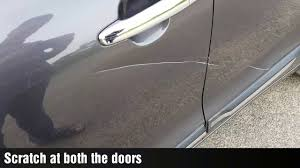

In [18]:
img=Image.open('testing\\scratch.jpg')
img

In [22]:
#so here i think the classification is working properly 
#now to think with insurance point of view....there are two options for me..1)using annotated data 2)using this type of classified data

In [19]:
def get_classes(file):
    photo=image.load_img(file)
    photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
    x=image.img_to_array(photo)
    x=np.expand_dims(x,axis=0)
    x/=255.0
    images=np.vstack([x])
    classes=model.predict(images)

In [20]:
get_classes('testing\\swift_rear.jpg')

In [21]:
print(classes)
np.argmax(classes)

[[4.93194629e-03 4.04310034e-04 3.90932024e-01 6.02969468e-01
  2.12477913e-04 1.22757128e-05 4.20825061e-04 1.16566065e-04]]


3

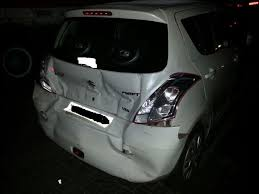

In [26]:
img=Image.open('testing\\swift_rear.jpg')
img

In [27]:
import anvil.server

In [28]:


anvil.server.connect("7MBSZN6O2RYE53YAEKOSTBIC-TP3W2PA4W7ETVKOC")


Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK


In [29]:
import anvil.media

In [ ]:
@anvil.server.callable
def classify(file):
    with anvil.media.TempFile(file) as filename:
        photo=image.load_img(filename)
    photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
    x=image.img_to_array(photo)
    x=np.expand_dims(x,axis=0)
    x/=255.0
    images=np.vstack([x])
    classes=model.predict(images)
    return classes
anvil.server.wait_forever()


Exception in thread Thread-8:
Traceback (most recent call last):
  File "c:\users\comp\appdata\local\programs\python\python38\lib\site-packages\anvil\server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "c:\users\comp\appdata\local\programs\python\python38\lib\site-packages\anvil\server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "c:\users\comp\appdata\local\programs\python\python38\lib\site-packages\anvil\_threaded_server.py", line 393, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\comp\appdata\local\programs\python\python38\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\users\comp\appdata\local\programs\python\python38\lib\threadin

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-18:
Traceback (most recent call last):
  File "c:\users\comp\appdata\local\programs\python\python38\lib\site-packages\anvil\server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "c:\users\comp\appdata\local\programs\python\python38\lib\site-packages\anvil\server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "c:\users\comp\appdata\local\programs\python\python38\lib\site-packages\anvil\_threaded_server.py", line 393, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\comp\appdata\local\programs\python\python38\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\users\comp\appdata\local\programs\python\python38\lib\threadi

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK


In [22]:
#this is the code to test the functions

In [26]:
def get_classes(file):
    photo=image.load_img(file)
    photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
    x=image.img_to_array(photo)
    x=np.expand_dims(x,axis=0)
    x/=255.0
    images=np.vstack([x])
    return model.predict(images)

In [24]:
l1=['bumper_dent','bumper_scratch','door_dent','door_scratch','glass_shatter','head_lamp','tail_lamp','unknown']

In [27]:
def get_answer(file):
    a=get_classes(file)
    a=np.argmax(a)
    result=l1[a]
    return result

In [28]:
get_answer('testing\\scratch.jpg')

'door_scratch'

In [29]:

import anvil.server

anvil.server.connect("X2322YLNFKS336CBO727GMBJ-7Y6XZ4MDCDDOEIA4")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK


In [ ]:
import anvil.media
@anvil.server.callable
def classify(photo):
    photo=photo.resize((244,244),resample=PIL.Image.BICUBIC)
    x=image.img_to_array(photo)
    x=np.expand_dims(x,axis=0)
    x/=255.0
    images=np.vstack([x])
    classes=model.predict(images)
    return classes
def get_answer(file):
    with anvil.media.TempFile(file) as filename:
        photo=image.load_img(filename)
    a=classify(photo)
    a=np.argmax(a)
    result=l1[a]
    return result

anvil.server.wait_forever()
